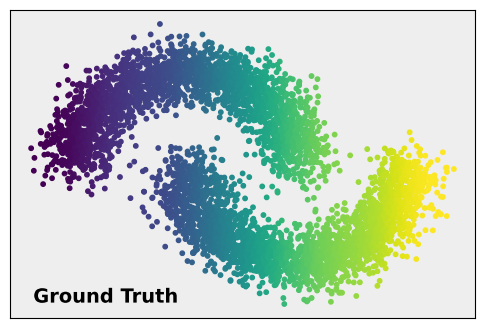

In [8]:
from util import moon
from matplotlib import pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

num_node = 5000

x,y = moon(num_node)
c = x[:, 0].argsort().argsort()
fig, ax = plt.figure(figsize=(5, 3)), plt.gca()
ax.scatter(x[:, 0], x[:, 1], c=c, s=10, rasterized=True)
ax.set_xticks([])
ax.set_yticks([])
ax.set_facecolor('#eeeeee')
txt = ax.text(0.05, 0.05, 'Ground Truth', color='k', fontsize=14, weight='bold', transform=ax.transAxes)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='#eeeeee')])
plt.savefig("./imgs/ground_truth.png")

In [ ]:
# Build a Network
